In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms

In [2]:
# Read csv file
df = pd.read_csv('coursework_1_data_2019.csv')

In [3]:
# Drop the columns that are not relevant to the research 
df.drop(columns=['2008_cases_total','2013_cases_total','2018_cases_total',
                 '2008_pop_total','2013_pop_total','2018_pop_total',
                 'total_budget','clean_air','clean_environ','health_training',
                 'school_awareness','media_awareness','sub_counselling','region','local_authority_type'], inplace=True)
df.shape

(152, 13)

In [4]:
# Calculate the male and female obesity case number per 1,000 people as childhood obesity rate
# The data type of all datasets are interval
df['2008_male_rate_per1000']=round(df['2008_cases_male']/df['2008_pop_male']*1000,2)
df['2008_female_rate_per1000']=round(df['2008_cases_female']/df['2008_pop_female']*1000,2)
df['2013_male_rate_per1000']=round(df['2013_cases_male']/df['2013_pop_male']*1000,2)
df['2013_female_rate_per1000']=round(df['2013_cases_female']/df['2013_pop_female']*1000,2)
df['2018_male_rate_per1000']=round(df['2018_cases_male']/df['2018_pop_male']*1000,2)
df['2018_female_rate_per1000']=round(df['2018_cases_female']/df['2018_pop_female']*1000,2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   local_authority_area      152 non-null    object 
 1   2008_cases_male           152 non-null    int64  
 2   2013_cases_male           152 non-null    int64  
 3   2018_cases_male           152 non-null    int64  
 4   2008_pop_male             152 non-null    int64  
 5   2013_pop_male             152 non-null    int64  
 6   2018_pop_male             152 non-null    int64  
 7   2008_cases_female         152 non-null    int64  
 8   2013_cases_female         152 non-null    int64  
 9   2018_cases_female         152 non-null    int64  
 10  2008_pop_female           152 non-null    int64  
 11  2013_pop_female           152 non-null    int64  
 12  2018_pop_female           152 non-null    int64  
 13  2008_male_rate_per1000    152 non-null    float64
 14  2008_femal

In [6]:
df.head()

,local_authority_area,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,2008_male_rate_per1000,2008_female_rate_per1000,2013_male_rate_per1000,2013_female_rate_per1000,2018_male_rate_per1000,2018_female_rate_per1000
0,Barking and Dagenham,187,190,230,83890,81915,77983,406,429,533,88794,97115,103796,2.23,4.57,2.32,4.42,2.95,5.14
1,Barnet,212,204,292,169060,161533,161769,327,390,481,171375,182529,194186,1.25,1.91,1.26,2.14,1.81,2.48
2,Barnsley,148,186,212,110384,117286,127055,212,265,315,116371,126724,130828,1.34,1.82,1.59,2.09,1.67,2.41
3,Bath and North East Somerset,157,129,156,87026,84077,90890,299,292,338,91599,88898,98444,1.80,3.26,1.53,3.28,1.72,3.43
4,Bedford,138,145,156,75929,85074,82609,173,182,211,82256,79733,87854,1.82,2.10,1.70,2.28,1.89,2.40


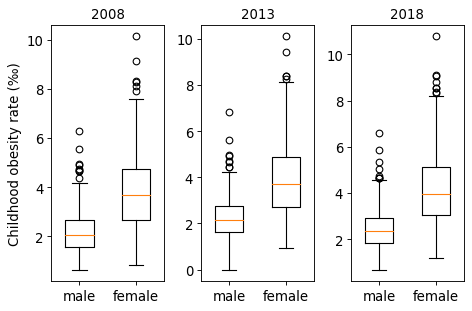

In [7]:
# Boxplot the childhood obesity rates
plt.figure(dpi=80)
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
df_2018=df['2018_male_rate_per1000'],df['2018_female_rate_per1000']
df_2013=df['2013_male_rate_per1000'],df['2013_female_rate_per1000']
df_2008=df['2008_male_rate_per1000'],df['2008_female_rate_per1000']

plt.sca(ax1)
plt.boxplot(df_2008,widths=0.5)
plt.xticks([1,2], ["male",'female'],fontsize=12)
plt.tick_params(labelsize=12)
plt.ylabel("Childhood obesity rate (‰)",fontsize=12)
plt.title("2008",fontsize=12)

plt.sca(ax2)
df_2013=df['2013_male_rate_per1000'],df['2013_female_rate_per1000']
plt.boxplot(df_2013,widths=0.5)
plt.xticks([1,2], ["male",'female'],fontsize=12)
plt.tick_params(labelsize=12)
plt.title("2013",fontsize=12)

plt.sca(ax3)
plt.boxplot(df_2018,widths=0.5)
plt.xticks([1,2], ["male",'female'],fontsize=12)
plt.tick_params(labelsize=12)
plt.title("2018",fontsize=12)

# And save the boxplot
plt.tight_layout()
plt.savefig('gender_boxpolt')

In [8]:
# Then discribe the boxplots
print(df['2008_male_rate_per1000'].describe(),df['2008_female_rate_per1000'].describe(),
df['2013_male_rate_per1000'].describe(),df['2013_female_rate_per1000'].describe(),
df['2018_male_rate_per1000'].describe(),df['2018_female_rate_per1000'].describe())

count    152.000000
mean       2.222763
std        0.974427
min        0.640000
25%        1.572500
50%        2.065000
75%        2.640000
max        6.300000
Name: 2008_male_rate_per1000, dtype: float64 count    152.000000
mean       3.936053
std        1.823016
min        0.840000
25%        2.650000
50%        3.665000
75%        4.730000
max       10.140000
Name: 2008_female_rate_per1000, dtype: float64 count    152.000000
mean       2.288026
std        1.004450
min        0.000000
25%        1.627500
50%        2.155000
75%        2.740000
max        6.820000
Name: 2013_male_rate_per1000, dtype: float64 count    152.000000
mean       4.076974
std        1.848219
min        0.930000
25%        2.720000
50%        3.695000
75%        4.895000
max       10.100000
Name: 2013_female_rate_per1000, dtype: float64 count    152.000000
mean       2.469934
std        0.987957
min        0.680000
25%        1.810000
50%        2.330000
75%        2.920000
max        6.590000
Name: 2018_male_

In [9]:
# Count the areas that female obesity rate is higher or lower than male obesity rate
# Then summarize the proportion
df['2008_female>male']=df['2008_female_rate_per1000']>df['2008_male_rate_per1000']
female_more=0
male_more=0
for i in df['2008_female>male']:
    if i==True:
        female_more+=1
    else:
        male_more+=1
female_more_proportion=round(female_more/(female_more+male_more),4)
male_more_proportion=round(male_more/(female_more+male_more),4)
print('2008:')
print('Number of areas that the female obesity rate is higher than male obesity rate:',female_more)
print('Number of areas that the female obesity rate is lower than male obesity rate:',male_more) 
print('The proportion of the area female obesity rate is higher:',female_more_proportion)
print('The proportion of the area male obesity rate is higher:',male_more_proportion)

df['2013_female>male']=df['2013_female_rate_per1000']>df['2013_male_rate_per1000']
female_more=0
male_more=0
for i in df['2013_female>male']:
    if i==True:
        female_more+=1
    else:
        male_more+=1
female_more_proportion=round(female_more/(female_more+male_more),4)
male_more_proportion=round(male_more/(female_more+male_more),4)
print('2013:')
print('Number of areas that the female obesity rate is higher than male obesity rate:',female_more)
print('Number of areas that the female obesity rate is lower than male obesity rate:',male_more) 
print('The proportion of the area female obesity rate is higher:',female_more_proportion)
print('The proportion of the area male obesity rate is higher:',male_more_proportion)

df['2018_female>male']=df['2018_female_rate_per1000']>df['2018_male_rate_per1000']
female_more=0
male_more=0
for i in df['2018_female>male']:
    if i==True:
        female_more+=1
    else:
        male_more+=1
female_more_proportion=round(female_more/(female_more+male_more),4)
male_more_proportion=round(male_more/(female_more+male_more),4)
print('2018:')
print('Number of areas that the female obesity rate is higher than male obesity rate:',female_more)
print('Number of areas that the female obesity rate is lower than male obesity rate:',male_more) 
print('The proportion of the area female obesity rate is higher:',female_more_proportion)
print('The proportion of the area male obesity rate is higher:',male_more_proportion)

2008:
Number of areas that the female obesity rate is higher than male obesity rate: 152
Number of areas that the female obesity rate is lower than male obesity rate: 0
The proportion of the area female obesity rate is higher: 1.0
The proportion of the area male obesity rate is higher: 0.0
2013:
Number of areas that the female obesity rate is higher than male obesity rate: 151
Number of areas that the female obesity rate is lower than male obesity rate: 1
The proportion of the area female obesity rate is higher: 0.9934
The proportion of the area male obesity rate is higher: 0.0066
2018:
Number of areas that the female obesity rate is higher than male obesity rate: 150
Number of areas that the female obesity rate is lower than male obesity rate: 2
The proportion of the area female obesity rate is higher: 0.9868
The proportion of the area male obesity rate is higher: 0.0132


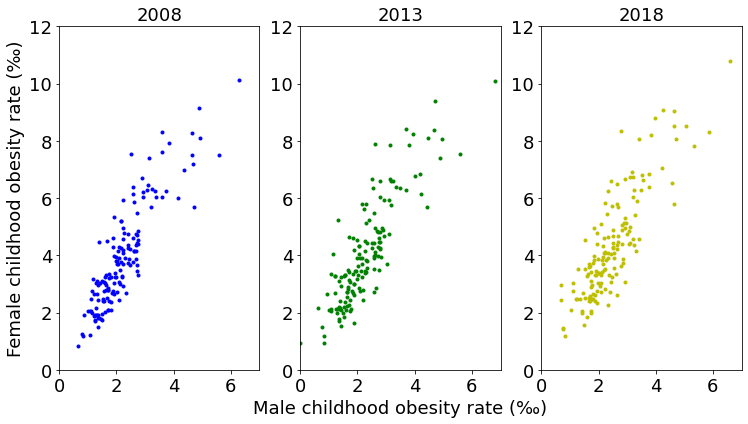

In [10]:
# Plot a scatter diagram of independent variables and dependent varibles
plt.figure(figsize=(10.5,6))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
my_x_ticks = np.arange(0, 7, 2)

plt.sca(ax1)
plt.xlim([0,7])
plt.ylim([0,12])
plt.title('2008',fontsize=18)
plt.xticks(my_x_ticks)
plt.tick_params(labelsize=18)
plt.ylabel('Female childhood obesity rate (‰)',fontsize=18)
plt.plot(df['2008_male_rate_per1000'],df['2008_female_rate_per1000'],'b.',label='2018')

plt.sca(ax2)
plt.xlim([0,7])
plt.ylim([0,12])
plt.title('2013',fontsize=18)
plt.xticks(my_x_ticks)
plt.tick_params(labelsize=18)
plt.xlabel("Male childhood obesity rate (‰)",fontsize=18)
plt.plot(df['2013_male_rate_per1000'],df['2013_female_rate_per1000'],'g.',label='2018')

plt.sca(ax3)
plt.xlim([0,7])
plt.ylim([0,12])
plt.title('2018',fontsize=18)
plt.xticks(my_x_ticks)
plt.tick_params(labelsize=18)
plt.plot(df['2018_male_rate_per1000'],df['2018_female_rate_per1000'],'y.',label='2018')
plt.tight_layout()

# And save the plot
plt.savefig('scatter_plot')

In [11]:
# Caculate the Pearson Correlation Coefficient between male and female rate
r_2008 = np.corrcoef(df['2008_male_rate_per1000'], df['2008_female_rate_per1000'])
r_2013 = np.corrcoef(df['2013_male_rate_per1000'], df['2013_female_rate_per1000'])
r_2018 = np.corrcoef(df['2018_male_rate_per1000'], df['2018_female_rate_per1000'])
print('2008:')
print('The Pearson Correlation Coefficient is:',round(r_2008[0][1],4))
print('2013:')
print('The Pearson Correlation Coefficient is:',round(r_2013[0][1],4))
print('2018:')
print('The Pearson Correlation Coefficient is:',round(r_2018[0][1],4))

2008:
The Pearson Correlation Coefficient is: 0.8847
2013:
The Pearson Correlation Coefficient is: 0.8601
2018:
The Pearson Correlation Coefficient is: 0.8499


In [12]:
# Perform the Simple linear Regression procedure and print summaries of the results
X_2008_male_rate = sms.add_constant(df['2008_male_rate_per1000'])
Y_2008_female_rate = df['2008_female_rate_per1000']
regression_model_a = sms.OLS(Y_2008_female_rate, X_2008_male_rate)
regression_model_b = regression_model_a.fit()
print(regression_model_b.summary())

X_2013_male_rate = sms.add_constant(df['2013_male_rate_per1000'])
Y_2013_female_rate = df['2013_female_rate_per1000']
regression_model_c = sms.OLS(Y_2013_female_rate, X_2013_male_rate)
regression_model_d = regression_model_c.fit()
print(regression_model_d.summary())

X_2018_male_rate = sms.add_constant(df['2018_male_rate_per1000'])
Y_2018_female_rate = df['2018_female_rate_per1000']
regression_model_e = sms.OLS(Y_2018_female_rate, X_2018_male_rate)
regression_model_f = regression_model_e.fit()
print(regression_model_f.summary())

                               OLS Regression Results                               
Dep. Variable:     2008_female_rate_per1000   R-squared:                       0.783
Model:                                  OLS   Adj. R-squared:                  0.781
Method:                       Least Squares   F-statistic:                     540.0
Date:                      Thu, 12 Nov 2020   Prob (F-statistic):           1.43e-51
Time:                              14:31:13   Log-Likelihood:                -190.47
No. Observations:                       152   AIC:                             384.9
Df Residuals:                           150   BIC:                             391.0
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [13]:
# Store all the relevant values and print them
print('2008:')
gradient_2008  = regression_model_b.params[1]
intercept_2008 = regression_model_b.params[0]
Rsquared_2008  = regression_model_b.rsquared
MSE_2008       = regression_model_b.mse_resid
pvalue_2008    = regression_model_b.f_pvalue
print("gradient  =", gradient_2008)
print("intercept =", intercept_2008)
print("Rsquared  =", Rsquared_2008)
print("MSE       =", MSE_2008)
print("pvalue    =", pvalue_2008)

print('2013:')
gradient_2013  = regression_model_d.params[1]
intercept_2013 = regression_model_d.params[0]
Rsquared_2013  = regression_model_d.rsquared
MSE_2013       = regression_model_d.mse_resid
pvalue_2013    = regression_model_d.f_pvalue
print("gradient  =", gradient_2013)
print("intercept =", intercept_2013)
print("Rsquared  =", Rsquared_2013)
print("MSE       =", MSE_2013)
print("pvalue    =", pvalue_2013)

print('2018:')
gradient_2018  = regression_model_f.params[1]
intercept_2018 = regression_model_f.params[0]
Rsquared_2018  = regression_model_f.rsquared
MSE_2018       = regression_model_f.mse_resid
pvalue_2018    = regression_model_f.f_pvalue
print("gradient  =", gradient_2018)
print("intercept =", intercept_2018)
print("Rsquared  =", Rsquared_2018)
print("MSE       =", MSE_2018)
print("pvalue    =", pvalue_2018)

2008:
gradient  = 1.6550728404857316
intercept = 0.2572176981150721
Rsquared  = 0.7826228280813954
MSE       = 0.7272443593404128
pvalue    = 1.4343309350395577e-51
2013:
gradient  = 1.5826291041940022
intercept = 0.4558766456803278
Rsquared  = 0.739788855500416
MSE       = 0.8947846068041168
pvalue    = 1.0642884882494074e-45
2018:
gradient  = 1.5822167420413489
intercept = 0.437555056154056
Rsquared  = 0.7223582262719135
MSE       = 0.9454223582630622
pvalue    = 1.3933609814402513e-43


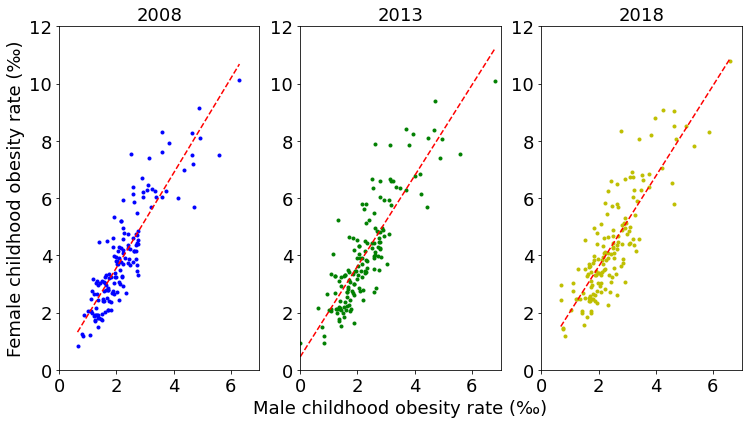

In [14]:
# Plot the regression
plt.figure(figsize=(10.5,6))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
plt.sca(ax1)
plt.xlim([0,7])
plt.ylim([0,12])
plt.title('2008',fontsize=18)
plt.xticks(my_x_ticks)
plt.tick_params(labelsize=18)
plt.ylabel('Female childhood obesity rate (‰)',fontsize=18)
x_lobf = [min(df['2008_male_rate_per1000']),max(df['2008_male_rate_per1000'])]
y_lobf = [x_lobf[0]*gradient_2008 + intercept_2008,x_lobf[1]*gradient_2008 + intercept_2008]
plt.plot(df['2008_male_rate_per1000'],df['2008_female_rate_per1000'],'b.',x_lobf,y_lobf,'r--')

plt.sca(ax2)
plt.xlim([0,7])
plt.ylim([0,12])
plt.title('2013',fontsize=18)
plt.xticks(my_x_ticks)
plt.tick_params(labelsize=18)
plt.xlabel("Male childhood obesity rate (‰)",fontsize=18)
x_lobf = [min(df['2013_male_rate_per1000']),max(df['2013_male_rate_per1000'])]
y_lobf = [x_lobf[0]*gradient_2013 + intercept_2013,x_lobf[1]*gradient_2013 + intercept_2013]
plt.plot(df['2013_male_rate_per1000'],df['2013_female_rate_per1000'],'g.',x_lobf,y_lobf,'r--')

plt.sca(ax3)
plt.xlim([0,7])
plt.ylim([0,12])
plt.title('2018',fontsize=18)
plt.xticks(my_x_ticks)
plt.tick_params(labelsize=18)
x_lobf = [min(df['2018_male_rate_per1000']),max(df['2018_male_rate_per1000'])]
y_lobf = [x_lobf[0]*gradient_2018 + intercept_2018,x_lobf[1]*gradient_2018 + intercept_2018]
plt.plot(df['2018_male_rate_per1000'],df['2018_female_rate_per1000'],'y.',x_lobf,y_lobf,'r--')
plt.tight_layout()

# Save the regression plot
plt.savefig('regression_figure')

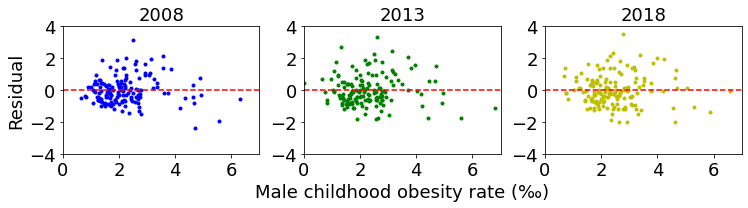

In [15]:
# Residuals vs Fits Plot
plt.figure(figsize=(10.5,3))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
my_y_ticks = np.arange(-4, 5, 2)

plt.sca(ax1)
plt.xlim([0,7])
plt.ylim([0,12])
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.title('2008',fontsize=18)
plt.ylabel('Residual',fontsize=18)
x_lobf = [0,7]
y_lobf = [0,0]
plt.xlim([0,7])
plt.ylim([-4,4])
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.tick_params(labelsize=18)
df['2008_residual'] = df['2008_female_rate_per1000'] - (df['2008_male_rate_per1000']*gradient_2008 + intercept_2008)
plt.plot(df['2008_male_rate_per1000'],df['2008_residual'],'b.',x_lobf,y_lobf,'r--')

plt.sca(ax2)
plt.xlim([0,7])
plt.ylim([0,12])
plt.title('2013',fontsize=18)
plt.xlabel("Male childhood obesity rate (‰)",fontsize=18)
x_lobf = [0,7]
y_lobf = [0,0]
plt.xlim([0,7])
plt.ylim([-4,4])
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.tick_params(labelsize=18)
df['2013_residual'] = df['2013_female_rate_per1000'] - (df['2013_male_rate_per1000']*gradient_2013 + intercept_2013)
plt.plot(df['2013_male_rate_per1000'],df['2013_residual'],'g.',x_lobf,y_lobf,'r--')

plt.sca(ax3)
plt.xlim([0,7])
plt.ylim([0,12])
plt.title('2018',fontsize=18)
x_lobf = [0,7]
y_lobf = [0,0]
plt.xlim([0,7])
plt.ylim([-4,4])
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.tick_params(labelsize=18)
df['2018_residual'] = df['2018_female_rate_per1000'] - (df['2018_male_rate_per1000']*gradient_2018 + intercept_2018)
plt.plot(df['2018_male_rate_per1000'],df['2018_residual'],'y.',x_lobf,y_lobf,'r--')
plt.tight_layout()

# Save the regression residual plot
plt.savefig('regression_residual')

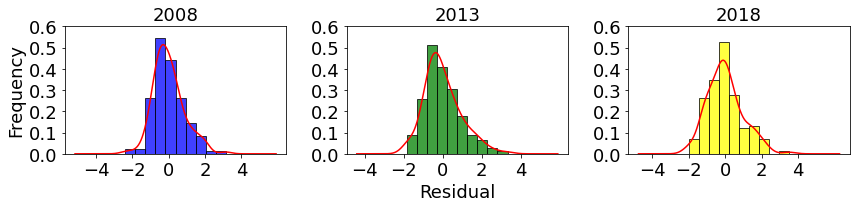

In [16]:
# Plot the residual frequency histogram and its kernel density curve
plt.figure(figsize=(12,3)) 
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
my_y_ticks_2 = np.arange(0, 0.7, 0.1)
plt.sca(ax1)
df['2008_residual'].plot(kind = 'hist', bins = 10, color = 'blue', edgecolor = 'black', density = True, alpha=0.75)
df['2008_residual'].plot(kind = 'kde', color = 'red')
#plt.hist(df['2008_residual'],color = 'blue')
plt.xticks(my_y_ticks)
plt.yticks(my_y_ticks_2)
plt.ylabel('Frequency',fontsize=18)
plt.title('2008',fontsize=18)
plt.tick_params(labelsize=18)

plt.sca(ax2)
df['2013_residual'].plot(kind = 'hist', bins = 10, color = 'green', edgecolor = 'black', density = True, alpha=0.75)
df['2013_residual'].plot(kind = 'kde', color = 'red')
#plt.hist(df['2013_residual'],color = 'green')
plt.xticks(my_y_ticks)
plt.yticks(my_y_ticks_2)
plt.title('2013',fontsize=18)
plt.xlabel("Residual",fontsize=18)
plt.ylabel(' ')
plt.tick_params(labelsize=18)

plt.sca(ax3)
df['2018_residual'].plot(kind = 'hist', bins = 10, color = 'yellow', edgecolor = 'black', density = True, alpha=0.75)
df['2018_residual'].plot(kind = 'kde', color = 'red')
#plt.hist(df['2018_residual'],color = 'yellow')
plt.xticks(my_y_ticks)
plt.yticks(my_y_ticks_2)
plt.title('2018',fontsize=18)
plt.ylabel(' ')
plt.tick_params(labelsize=18)
plt.tight_layout()
plt.savefig('regression_residual_histogram')